In [1]:
import pickle
import torch
from torch import nn
from torch.nn import functional as F
from torch import optim
from dlc_practical_prologue import *
from projet1_helpers import *
import baseline as Baseline
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

## Baseline
Use basic mlp

In [2]:
with open(f'data.p', 'rb') as f:
    train_input, train_target, train_classes,val_input,test_input,val_target,test_target,val_classes,test_classes = pickle.load(f)

In [11]:
torch.manual_seed(42)
losses, losses_val, accuracies_train, accuracies_test, accuracies_val  = Baseline.train_all(train_input, train_target, 
                                                                                            train_classes,val_input,
                                                                                            val_target, val_classes, 
                                                                                            test_input, test_target, test_classes,nb_epochs = 100)

--------------------------------------------------  
 Iteration 0 
 
Baseline Training accuracy is 1.0 
Baseline Validation accuracy is 0.8 
--------------------------------------------------  
 Iteration 1 
 
Baseline Training accuracy is 1.0 
Baseline Validation accuracy is 0.784 
--------------------------------------------------  
 Iteration 2 
 
Baseline Training accuracy is 1.0 
Baseline Validation accuracy is 0.784 
--------------------------------------------------  
 Iteration 3 
 
Baseline Training accuracy is 1.0 
Baseline Validation accuracy is 0.782 
--------------------------------------------------  
 Iteration 4 
 
Baseline Training accuracy is 1.0 
Baseline Validation accuracy is 0.794 
--------------------------------------------------  
 Iteration 5 
 
Baseline Training accuracy is 1.0 
Baseline Validation accuracy is 0.824 
--------------------------------------------------  
 Iteration 6 
 
Baseline Training accuracy is 1.0 
Baseline Validation accuracy is 0.79 
--

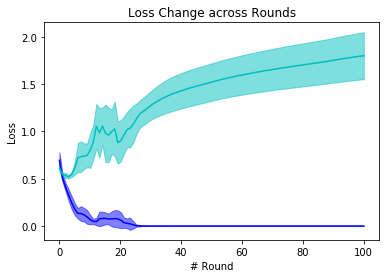

In [18]:
plt.figure()
plotloss(losses.T/10,color= 'b')
plotloss(losses_val.T,color= 'c')
plt.show()

### Evaluation of model performance

In [19]:
accs_train = torch.Tensor(accuracies_train)
print(f"The training accuracy of the model is {accs_train.mean():.4f} ± {accs_train.var():.4f} ")

The training accuracy of the model is 1.0000 ± 0.0000 


In [20]:
accs_val = torch.Tensor(accuracies_val)
print(f"The test accuracy of the model is {accs_val.mean():.4f} ± {accs_val.var():.4f} ")

The test accuracy of the model is 0.7952 ± 0.0003 


In [21]:
accs_test = torch.Tensor(accuracies_test)
print(f"The test accuracy of the model is {accs_test.mean():.4f} ± {accs_test.var():.4f} ")

The test accuracy of the model is 0.8125 ± 0.0002 


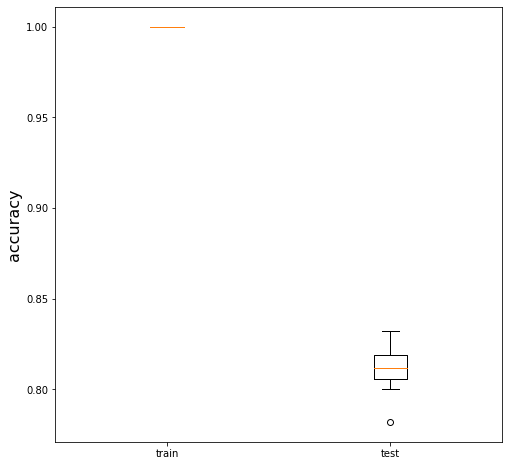

In [22]:
plot_performance(accuracies_train,accuracies_test)

In [17]:
with open(f'produced/baseline_accuracy.p', 'wb') as f:
    pickle.dump(accuracies_test ,f)